
# Functional Data Analysis and Regression

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
flowers_df = pd.read_csv("data/main_tables/flowers.csv")
plants_df = pd.read_csv("data/main_tables/plants.csv")
plant_measurements_df = pd.read_csv("data/main_tables/plant_measurements.csv")
flower_counts_df = pd.read_csv("data/main_tables/flower_counts.csv")
temp_summary_wide_df = pd.read_csv("data/main_tables/temperature_summary_wide.csv")

In [4]:
flower_counts_mean = (
    flower_counts_df[["Plant", "Num_flowers"]]
    .groupby(by="Plant", as_index=False)
    .mean()
)
flowers_mean = (
    flowers_df[
        ["Plant", "Year", "Nectar_pH", "Bacterial_CFU_per_uL", "Fungal_CFU_per_uL"]
    ]
    .groupby(by=["Plant", "Year"], as_index=False)
    .mean()
)
plant_measurements_mean = (
    plant_measurements_df[
        [
            "Plant",
            "Year",
            "Jan_PAR_mol_m2_day",
            "Feb_PAR_mol_m2_day",
            "Mar_PAR_mol_m2_day",
            "Apr_PAR_mol_m2_day",
            "May_PAR_mol_m2_day",
            "Jun_PAR_mol_m2_day",
            "Jul_PAR_mol_m2_day",
            "Aug_PAR_mol_m2_day",
            "Sep_PAR_mol_m2_day",
            "Oct_PAR_mol_m2_day",
            "Nov_PAR_mol_m2_day",
            "Dec_PAR_mol_m2_day",
            "deltaC13",
            "Volume_m3",
            "Height_m",
        ]
    ]
    .groupby(by=["Plant", "Year"], as_index=False)
    .mean()
)
temps_mean = temp_summary_wide_df.groupby(by=["Plant", "Year"], as_index=False).mean()

In [5]:
from functools import reduce

plant_summary_df = reduce(
    lambda left, right: pd.merge(left, right, on=["Plant", "Year"], how="outer"),
    [flowers_mean, plant_measurements_mean, temps_mean],
)
plant_summary_df = pd.merge(
    flower_counts_mean,
    plant_summary_df,
    on="Plant",
    how="inner",
)
plant_summary_df["Year"] = pd.to_datetime(plant_summary_df["Year"], format="%Y")
plant_summary_df.sort_values(by=["Plant", "Year"], inplace=True)

In [6]:
plant_summary_df.head()

,Plant,Num_flowers,Year,Nectar_pH,Bacterial_CFU_per_uL,Fungal_CFU_per_uL,Jan_PAR_mol_m2_day,Feb_PAR_mol_m2_day,Mar_PAR_mol_m2_day,Apr_PAR_mol_m2_day,...,May_Temp_daily_mean,May_Temp_daily_min,May_Temp_daily_range,Week8_Temp_daily_min,Week8_Temp_daily_max,Week8_Temp_daily_range,Week8_Temp_daily_mean,Jan_Temp_daily_range,Feb_Temp_daily_range,Mar_Temp_daily_range
0,3,9.883730,2012-01-01,5.00,77.600000,NaN,15.21,22.64,39.06,46.44,...,15.031495,7.295071,18.386643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,9.883730,2013-01-01,5.00,77.600000,NaN,NaN,NaN,NaN,NaN,...,16.320797,9.022650,18.299750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,9.883730,2014-01-01,4.75,30.095238,2.552381,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,14.280357,2012-01-01,NaN,NaN,NaN,6.82,14.62,24.72,36.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,14.280357,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
plant_summary_df[plant_summary_df["Plant"] == 106]

,Plant,Num_flowers,Year,Nectar_pH,Bacterial_CFU_per_uL,Fungal_CFU_per_uL,Jan_PAR_mol_m2_day,Feb_PAR_mol_m2_day,Mar_PAR_mol_m2_day,Apr_PAR_mol_m2_day,...,May_Temp_daily_mean,May_Temp_daily_min,May_Temp_daily_range,Week8_Temp_daily_min,Week8_Temp_daily_max,Week8_Temp_daily_range,Week8_Temp_daily_mean,Jan_Temp_daily_range,Feb_Temp_daily_range,Mar_Temp_daily_range
607,106,100.592361,2015-01-01,NaN,NaN,NaN,13.19,19.70,39.10,50.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,106,100.592361,2016-01-01,NaN,NaN,NaN,13.19,19.70,39.10,50.49,...,15.184009,10.367333,10.750444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,106,100.592361,2017-01-01,5.000000,347.877680,0.000000,14.24,21.40,42.56,52.48,...,16.891512,9.068750,19.217562,NaN,NaN,NaN,NaN,NaN,NaN,NaN
605,106,100.592361,2018-01-01,5.187500,465.255615,0.000000,14.24,21.40,42.56,52.48,...,15.712388,8.194750,18.629750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,106,100.592361,2019-01-01,5.344118,61.615385,1254.615385,13.39,18.91,34.77,44.37,...,14.167270,8.355238,15.065714,7.3625,19.907,12.5445,11.858277,9.767094,9.815034,12.584353


In [8]:
plant_summary_df["Year"].value_counts()

Year
2012-01-01    91
2013-01-01    87
2015-01-01    79
2016-01-01    75
2014-01-01    72
2022-01-01    69
2017-01-01    66
2019-01-01    62
2018-01-01    61
Name: count, dtype: int64

In [9]:
years = plant_summary_df["Year"].sort_values().unique()

In [10]:
print(years)

<DatetimeArray>
['2012-01-01 00:00:00', '2013-01-01 00:00:00', '2014-01-01 00:00:00',
 '2015-01-01 00:00:00', '2016-01-01 00:00:00', '2017-01-01 00:00:00',
 '2018-01-01 00:00:00', '2019-01-01 00:00:00', '2022-01-01 00:00:00']
Length: 9, dtype: datetime64[ns]


Split features into train/test before filling NA values

In [11]:
plant_ids = [
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    13,
    15,
    16,
    18,
    19,
    21,
    22,
    24,
    28,
    29,
    32,
    35,
    36,
    37,
    38,
    39,
    41,
    42,
    43,
    44,
    45,
    46,
    47,
    48,
    49,
    50,
    51,
    52,
    53,
    54,
    55,
    56,
    57,
    58,
    59,
    60,
    61,
    62,
    64,
    65,
    66,
    67,
    69,
    70,
    72,
    73,
    74,
    75,
    76,
    77,
    79,
    82,
    83,
    87,
    89,
    92,
    94,
    95,
    96,
    97,
    98,
    99,
    103,
    104,
    106,
    108,
    110,
    111,
    114,
    200,
]  # use the same as non-FDA analyses

In [12]:
len(plant_ids)

79

In [13]:
plant_summary_filtered = plant_summary_df[plant_summary_df["Plant"].isin(plant_ids)]

In [14]:
y = (
    plant_summary_filtered[["Plant", "Num_flowers"]]
    .groupby("Plant")
    .max()["Num_flowers"]
    .values
)

In [15]:
y.size

79

In [16]:
plant_summary_features = plant_summary_filtered.drop(columns="Num_flowers")

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train_ids, test_ids, y_train, y_test = train_test_split(
    plant_ids,
    y,
    test_size=0.15,
    random_state=229,
)

In [19]:
len(train_ids), len(test_ids)

(67, 12)

In [20]:
X_train_raw, X_test_raw = (
    plant_summary_features[plant_summary_filtered["Plant"].isin(train_ids)],
    plant_summary_features[plant_summary_filtered["Plant"].isin(test_ids)],
)

In [21]:
def interpolate_missing_data(plant_summary: pd.DataFrame, ids: np.ndarray):
    plant_summary_interpolated = pd.DataFrame()
    for plant_id in ids:
        plant_data = plant_summary[plant_summary["Plant"] == plant_id].set_index("Year")
        plant_data = plant_data.reindex(years)
        plant_data = plant_data.interpolate(method="time", limit_direction="both")
        plant_data["Plant"] = plant_id
        plant_summary_interpolated = pd.concat(
            [plant_summary_interpolated, plant_data.reset_index()]
        )
    return plant_summary_interpolated

In [22]:
X_train, X_test = interpolate_missing_data(
    X_train_raw, train_ids
), interpolate_missing_data(X_test_raw, test_ids)

In [23]:
from skfda import FDataGrid
from skfda.preprocessing.missing import MissingValuesInterpolation

mvi = MissingValuesInterpolation()

In [24]:
years_str = pd.Series(years).dt.year.astype(str).values

In [25]:
years_float = pd.Series(years).dt.year.astype(float).values

In [26]:
def create_data_grid(X: pd.DataFrame, ids: np.ndarray):
    pivoted = X.pivot(index="Plant", columns="Year")
    pivoted.columns = [
        "_".join(map(str, col)).strip() for col in pivoted.columns.values
    ]
    reshaped = pivoted.values.reshape((len(ids), len(years), -1))
    interped_grid = mvi.fit_transform(
        FDataGrid(data_matrix=reshaped, grid_points=years_float)
    )
    interped_matrix = interped_grid.data_matrix
    means = np.mean(interped_matrix, axis=(0, 1))
    stds = np.std(interped_matrix, axis=(0, 1))
    interped_std = (interped_matrix - means) / stds
    return FDataGrid(data_matrix=interped_std, grid_points=years_float)


X_train_fd, X_test_fd = create_data_grid(X_train, train_ids), create_data_grid(
    X_test, test_ids
)

In [77]:
from skfda.ml.regression import LinearRegression, KernelRegression, FPCARegression
from skfda.representation.basis import MonomialBasis, VectorValuedBasis
from skfda.misc.hat_matrix import NadarayaWatsonHatMatrix, KNeighborsHatMatrix
from skfda.exploratory.visualization.representation import GraphPlot
from skfda.preprocessing.dim_reduction import FPCA
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
n_basis = 1  # hyperparameter for fitting n_basis - 1 degree polynomials
n_features = X_train_fd.data_matrix.shape[2]
vv_basis = VectorValuedBasis([MonomialBasis(n_basis=n_basis)] * n_features)
X_train_basis = X_train_fd.to_basis(vv_basis)
X_test_basis = X_test_fd.to_basis(vv_basis)

In [99]:
top6_train_fd = FDataGrid(
    data_matrix=X_train_fd.data_matrix[:, :, :6], grid_points=years_float
)
top6_basis = top6_train_fd.to_basis(VectorValuedBasis([MonomialBasis(n_basis=4)] * 6))

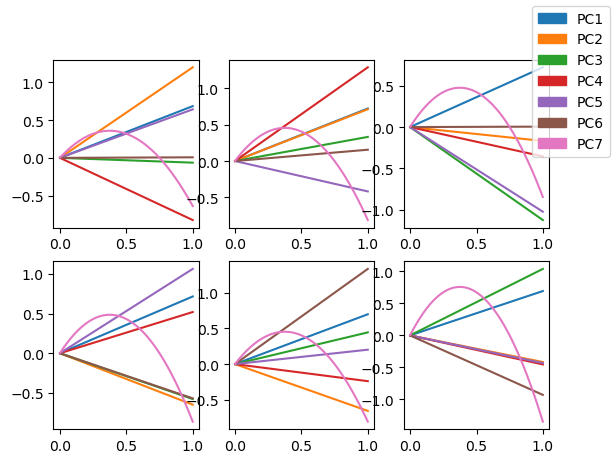

In [102]:
fpca_discretized = FPCA(n_components=7)
fpca_discretized.fit(top6_basis)
fpca_discretized.components_.plot(
    legend=True, group_names=[f"PC{i + 1}" for i in range(7)], group=range(7)
)
plt.show()

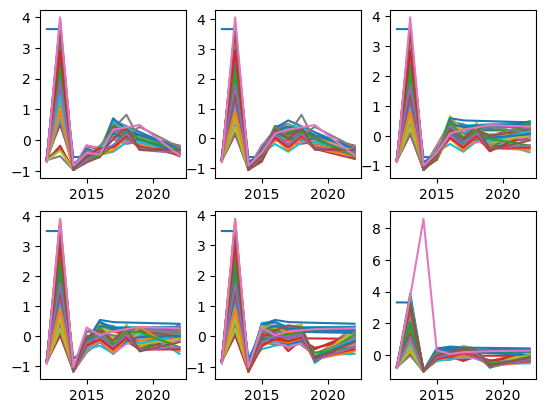

In [92]:
GraphPlot(top6_train_fd).plot()
plt.show()

#### FDA Linear Regression

In [53]:
lreg = LinearRegression()
lreg.fit(
    X_train_basis,
    y_train,
)

In [51]:
y_train_preds = lreg.predict(X_train_basis)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(2.316114717434856e-25, 1.0)

In [52]:
y_test_preds = lreg.predict(X_test_basis)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(19084.602735266333, -26.858808501975666)

#### Kernel Regression

In [55]:
nwm_kreg = KernelRegression(kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=1))
kn_kreg = KernelRegression(kernel_estimator=KNeighborsHatMatrix())

In [56]:
nwm_kreg.fit(X_train_fd, y_train)

KernelRegression(kernel_estimator=NadarayaWatsonHatMatrix(bandwidth=1))

In [59]:
# NadarayaWatson kernel matrix
y_train_preds = nwm_kreg.predict(X_train_fd)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(0.00019465393448580285, 0.9999995841953038)

In [61]:
y_test_preds = nwm_kreg.predict(X_test_fd)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(1454.6921196259082, -1.123491369045031)

In [57]:
kn_kreg.fit(X_train_fd, y_train)

KernelRegression(kernel_estimator=KNeighborsHatMatrix())

In [62]:
# KNeighbors kernel matrix
y_train_preds = kn_kreg.predict(X_train_fd)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(358.7691263480717, 0.23362511016214071)

In [63]:
y_test_preds = kn_kreg.predict(X_test_fd)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(972.2240705501164, -0.41920712619376355)

#### FPCA Regression

In [66]:
fpca_reg = FPCARegression(
    n_components=5
)  # max is number of discretization points (7 years of data)
fpca_reg.fit(X_train_basis, y_train)

FPCARegression()

In [67]:
# KNeighbors kernel matrix
y_train_preds = fpca_reg.predict(X_train_basis)
mean_squared_error(y_train, y_train_preds), r2_score(y_train, y_train_preds)

(349.06046124052256, 0.25436401049062674)

In [68]:
y_test_preds = fpca_reg.predict(X_test_basis)
mean_squared_error(y_test, y_test_preds), r2_score(y_test, y_test_preds)

(876.5436432563278, -0.27953732335111803)

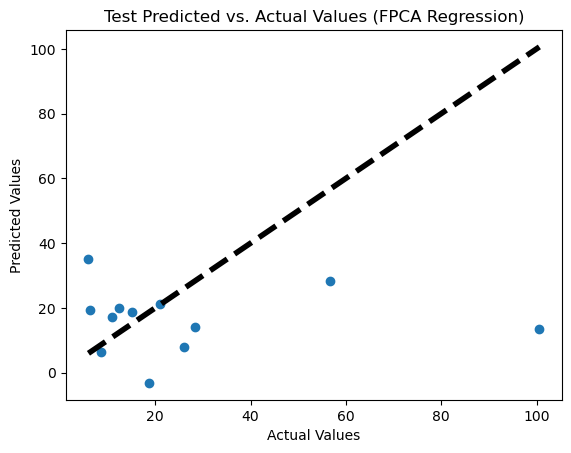

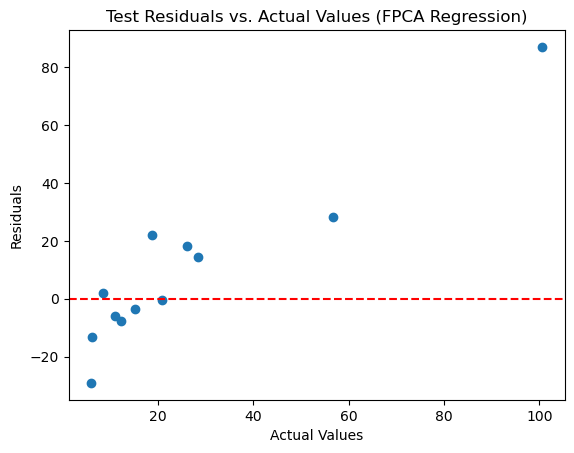

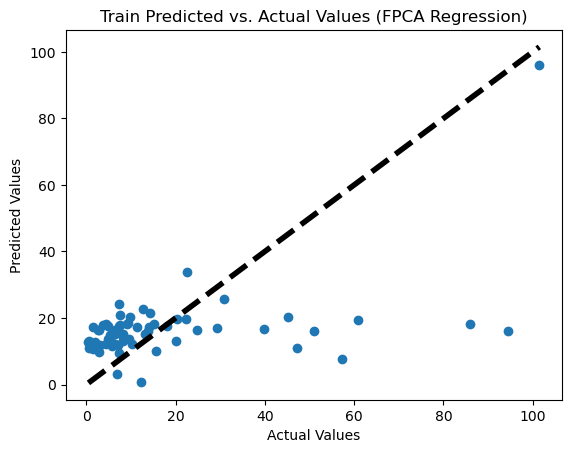

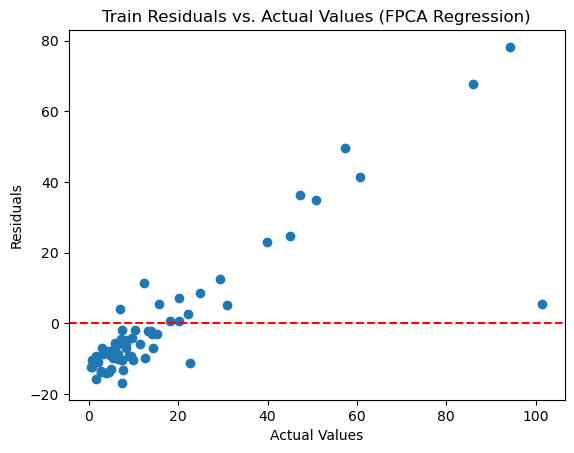

In [107]:
plt.scatter(y_test, y_test_preds)
plt.title("Test Predicted vs. Actual Values (FPCA Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=4)
plt.show()
residuals = y_test - y_test_preds
plt.title("Test Residuals vs. Actual Values (FPCA Regression)")
plt.scatter(y_test, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()

plt.scatter(y_train, y_train_preds)
plt.title("Train Predicted vs. Actual Values (FPCA Regression)")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "k--", lw=4)
plt.show()
residuals = y_train - y_train_preds
plt.title("Train Residuals vs. Actual Values (FPCA Regression)")
plt.scatter(y_train, residuals)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color="r", linestyle="--")
plt.show()